In [1]:
import os
import sys

src_directory = os.path.abspath(os.path.join('..', 'src'))

if src_directory not in sys.path:
    sys.path.append(src_directory)

In [2]:
from utilities import fetch_data, engineer_features, train_models, summarize_results, make_dirs, plot_distribution, plot_correlation

In [3]:
import os
import pandas as pd

data_directory = make_dirs(parent_directory='..', folder_name='data')
raw_data_directory = make_dirs(parent_directory=data_directory, folder_name='raw')
processed_data_directory = make_dirs(parent_directory=data_directory, folder_name='processed')

figure_directory = make_dirs(parent_directory='..', folder_name='figures')

In [4]:
# 1. Load Data
df = fetch_data("IONQ")
raw_path = os.path.join(raw_data_directory, 'raw.csv')
df.to_csv(raw_path)
print(f'Raw data successfully saved at: {raw_path}')
df

Raw data successfully saved at: ..\data\raw\raw.csv


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04 00:00:00-05:00,11.125000,11.250000,10.500000,10.800000,150500
2021-01-05 00:00:00-05:00,10.850000,11.830000,10.750000,11.110000,165300
2021-01-06 00:00:00-05:00,11.500000,11.500000,11.000000,11.050000,175600
2021-01-07 00:00:00-05:00,11.500000,11.500000,11.050000,11.110000,94200
2021-01-08 00:00:00-05:00,11.650000,12.350000,11.000000,11.010000,137500
...,...,...,...,...,...
2025-08-22 00:00:00-04:00,37.099998,39.919998,36.650002,39.779999,15199400
2025-08-25 00:00:00-04:00,39.700001,39.820000,38.529999,38.680000,12158700
2025-08-26 00:00:00-04:00,38.849998,40.919998,38.709999,40.750000,13548900


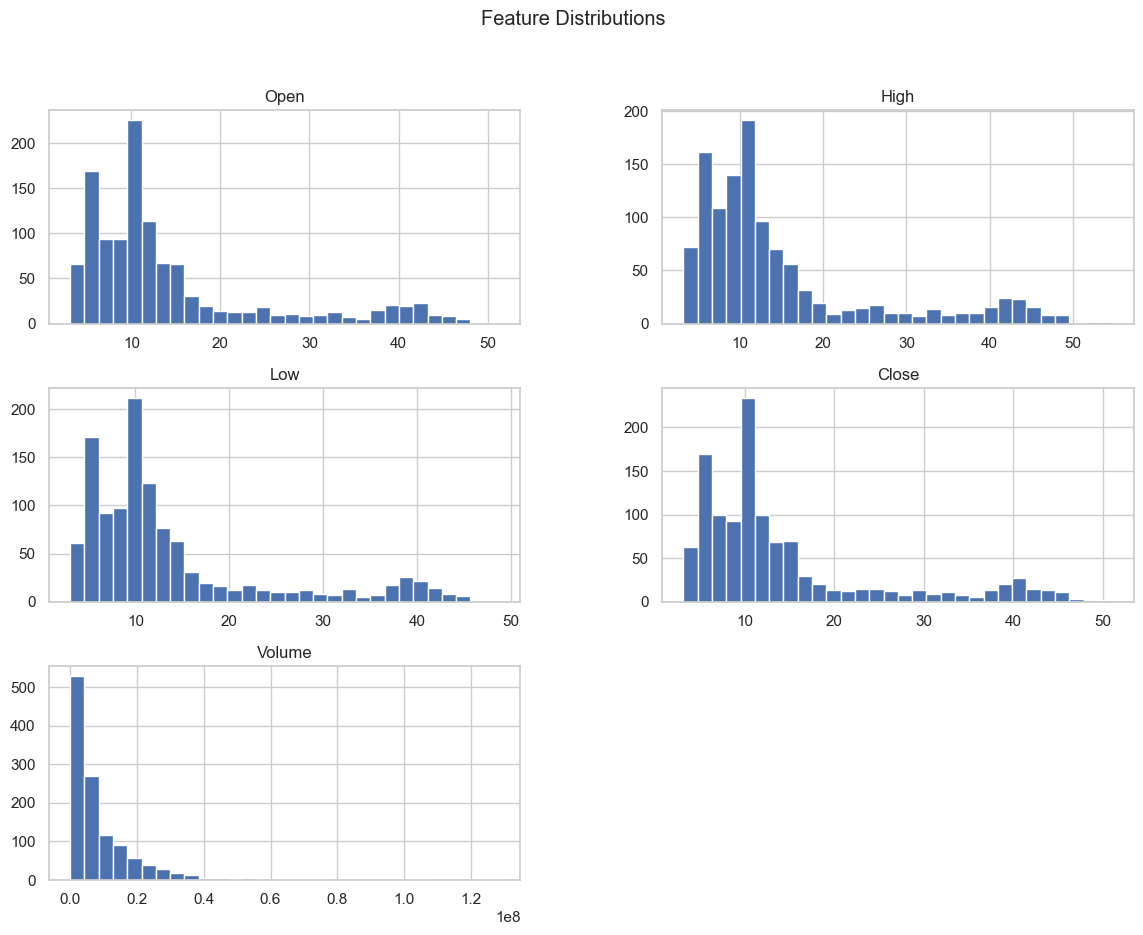

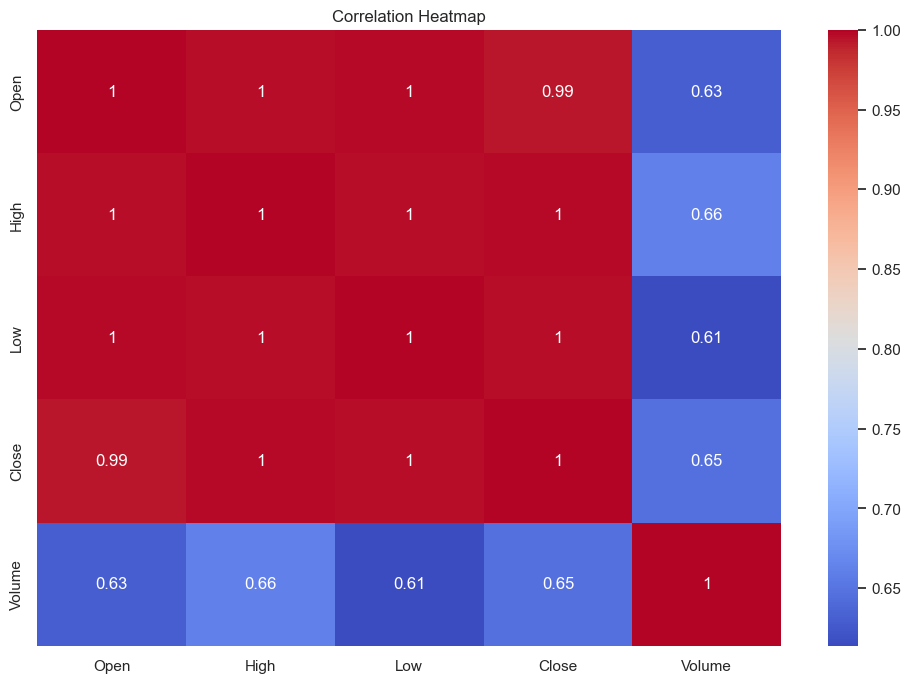

In [5]:
# 2. Explore data visually
plot_distribution(df, save_path=f"{figure_directory}/distributions.png")
plot_correlation(df, save_path=f"{figure_directory}/correlation.png")

In [6]:
# 3. Feature Engineering
df = engineer_features(df)
processed_path = os.path.join(processed_data_directory, 'processed.csv')
df.to_csv(processed_path)
print(f'Processed data successfully saved at: {processed_path}')
df

Processed data successfully saved at: ..\data\processed\processed.csv


,Open,High,Low,Close,Volume,volume_imbalance_signal,volatility_of_pressure,intraday_pressure_index,volume_imbalance_signal_z_score,cumulative_abnormal_pressure,range_volume_volatility,order_flow_proxy,volume_shock_index,price_momentum_pressure,close_direction
Date,,,,,,,,,,,,,,,
2021-02-10 00:00:00-05:00,11.860000,11.910000,11.650000,-0.009174,151300,3.026069e+03,1.320274e+05,1.718442e-06,0.334897,1.063925,6.194230e-08,1.777775e+06,-0.801722,1191.918059,0
2021-02-11 00:00:00-05:00,11.880000,11.940000,11.560000,-0.009259,83200,-9.151971e+03,1.083520e+05,4.567298e-06,0.452825,-1.335724,9.987087e-08,9.634561e+05,-0.931712,-5.045595,0
2021-02-12 00:00:00-05:00,11.650000,11.800000,11.610000,0.002549,117200,1.758007e+04,9.344485e+04,1.621165e-06,0.605989,1.307664,5.604922e-08,1.371826e+06,-0.686155,498.725307,1
2021-02-16 00:00:00-05:00,11.800000,11.890000,11.610000,-0.008475,265500,-2.655010e+04,4.232320e+04,1.054617e-06,-0.269697,3.106210,9.326455e-08,3.069180e+06,0.040761,-791.866205,0
2021-02-17 00:00:00-05:00,11.850000,11.850000,11.670000,0.009402,177400,-7.095993e+03,3.994287e+04,1.014658e-06,0.113386,3.223963,7.486189e-08,2.079128e+06,-0.246078,743.437232,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-22 00:00:00-04:00,37.099998,39.919998,36.650002,0.070218,15199400,4.073440e+07,4.537918e+07,2.151399e-07,0.858642,3.056657,4.307705e-09,5.797811e+08,-0.530933,-264153.435512,1
2025-08-25 00:00:00-04:00,39.700001,39.820000,38.529999,-0.027652,12158700,-1.240188e+07,4.484118e+07,1.060969e-07,-0.289951,1.518501,1.814970e-09,4.624562e+08,-0.831031,-472812.912806,0
2025-08-26 00:00:00-04:00,38.849998,40.919998,38.709999,0.053516,13548900,2.574293e+07,4.212377e+07,1.631128e-07,0.485805,3.327093,3.076017e-09,5.371461e+08,-0.551695,181711.145360,1


In [7]:
# 3. Prepare Train/Test Data
X = df.drop(columns=['Open','High','Low','Close','Volume','close_direction']).dropna()
y = df['close_direction']

In [8]:
X

,volume_imbalance_signal,volatility_of_pressure,intraday_pressure_index,volume_imbalance_signal_z_score,cumulative_abnormal_pressure,range_volume_volatility,order_flow_proxy,volume_shock_index,price_momentum_pressure
Date,,,,,,,,,
2021-02-10 00:00:00-05:00,3.026069e+03,1.320274e+05,1.718442e-06,0.334897,1.063925,6.194230e-08,1.777775e+06,-0.801722,1191.918059
2021-02-11 00:00:00-05:00,-9.151971e+03,1.083520e+05,4.567298e-06,0.452825,-1.335724,9.987087e-08,9.634561e+05,-0.931712,-5.045595
2021-02-12 00:00:00-05:00,1.758007e+04,9.344485e+04,1.621165e-06,0.605989,1.307664,5.604922e-08,1.371826e+06,-0.686155,498.725307
2021-02-16 00:00:00-05:00,-2.655010e+04,4.232320e+04,1.054617e-06,-0.269697,3.106210,9.326455e-08,3.069180e+06,0.040761,-791.866205
2021-02-17 00:00:00-05:00,-7.095993e+03,3.994287e+04,1.014658e-06,0.113386,3.223963,7.486189e-08,2.079128e+06,-0.246078,743.437232
...,...,...,...,...,...,...,...,...,...
2025-08-22 00:00:00-04:00,4.073440e+07,4.537918e+07,2.151399e-07,0.858642,3.056657,4.307705e-09,5.797811e+08,-0.530933,-264153.435512
2025-08-25 00:00:00-04:00,-1.240188e+07,4.484118e+07,1.060969e-07,-0.289951,1.518501,1.814970e-09,4.624562e+08,-0.831031,-472812.912806
2025-08-26 00:00:00-04:00,2.574293e+07,4.212377e+07,1.631128e-07,0.485805,3.327093,3.076017e-09,5.371461e+08,-0.551695,181711.145360


In [9]:
# 4. Train Models
results = train_models(X, y)
results

C:\Users\Munj Patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ Completed Fold 1
✅ Completed Fold 2


C:\Users\Munj Patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ Completed Fold 3
✅ Completed Fold 4


C:\Users\Munj Patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ Completed Fold 5


C:\Users\Munj Patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ Completed Fold 6


C:\Users\Munj Patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ Completed Fold 7


C:\Users\Munj Patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ Completed Fold 8


C:\Users\Munj Patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ Completed Fold 9
✅ Completed Fold 10


C:\Users\Munj Patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'RandomForest': [0.7572815533980582,
  0.8640776699029126,
  0.7961165048543689,
  0.8737864077669902,
  0.8349514563106796,
  0.8543689320388349,
  0.8058252427184466,
  0.883495145631068,
  0.8349514563106796,
  0.7864077669902912],
 'BernoulliNB': [0.7281553398058253,
  0.7864077669902912,
  0.8543689320388349,
  0.8543689320388349,
  0.8737864077669902,
  0.8640776699029126,
  0.7961165048543689,
  0.8155339805825242,
  0.8446601941747572,
  0.7864077669902912],
 'MLPClassifier': [0.6796116504854369,
  0.8640776699029126,
  0.7572815533980582,
  0.7864077669902912,
  0.7184466019417476,
  0.8155339805825242,
  0.8349514563106796,
  0.8737864077669902,
  0.7864077669902912,
  0.6796116504854369]}

In [10]:
# 5. Summarize Results
summary_df = summarize_results(results)
summary_path = os.path.join(processed_data_directory, "model_summary.csv")
summary_df.to_csv()
print(f'Summary table successfully saved at: {summary_path}')
summary_df

Summary table successfully saved at: ..\data\processed\model_summary.csv


,model,mean_accuracy,std_accuracy,min_accuracy,max_accuracy
0,RandomForest,0.829126,0.039365,0.757282,0.883495
1,BernoulliNB,0.820388,0.043689,0.728155,0.873786
2,MLPClassifier,0.779612,0.066849,0.679612,0.873786
